<a href="https://colab.research.google.com/github/illhammm/Sign_language_preprocessing/blob/the_end_changes/more_clean_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Установка необходимых библиотек*

In [1]:
!pip install pyarrow
!pip install pandas
!pip install opencv-python
!pip install opencv-python
!pip install --upgrade opencv-python

*Импорт библиотек*

In [2]:
import pandas as pd
import pyarrow.parquet as pq
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

*Чтение DataFrame из .pkl файла* (**если файл не найден, загрузка из Google Colab**)

In [3]:
try:
    df = pd.read_pickle('train-00000-of-00001-a16b0610cb895cd7.pkl')
except FileNotFoundError:
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    table = pq.read_table(file_name)
    df = table.to_pandas()
    df.to_pickle('train-00000-of-00001-a16b0610cb895cd7.pkl')

*Вывод информации о DataFrame*

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  504 non-null    int64 
 1   image     504 non-null    object
 2   width     504 non-null    int32 
 3   height    504 non-null    int32 
 4   objects   504 non-null    object
dtypes: int32(2), int64(1), object(2)
memory usage: 15.9+ KB
None


*Вывод первых несколько строк DataFrame*

In [5]:
print(df.head())

   image_id                                              image  width  height  \
0       184  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    640     640   
1       403  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    640     640   
2       393  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    640     640   
3       317  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    640     640   
4       304  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    640     640   

                                             objects  
0  {'id': [184], 'area': [39601], 'bbox': [[200.0...  
1  {'id': [403], 'area': [81840], 'bbox': [[56.0,...  
2  {'id': [393], 'area': [91178], 'bbox': [[87.0,...  
3  {'id': [317], 'area': [30397], 'bbox': [[237.0...  
4  {'id': [304], 'area': [92757], 'bbox': [[32.0,...  


**Вывод названий всех столбцов в DataFrame**, *чтобы знать название шапки таблицы строки с изображениями*

In [6]:
print(df.columns)

Index(['image_id', 'image', 'width', 'height', 'objects'], dtype='object')


*Узнаем тип данных изображений в столбце*

In [7]:
data_types = df['image'].apply(type).unique()
print(f"Уникальные типы данных во втором столбце: {data_types}")

Уникальные типы данных во втором столбце: [<class 'dict'>]


*Тоже самое по-сути:*

In [8]:
data_type = type(df.iloc[0, 1])
print(f"Тип данных во втором столбце: {data_type}")

Тип данных во втором столбце: <class 'dict'>


*Функция для преобразования словаря с изображением в формат OpenCV*

In [9]:
def convert_dict_to_opencv(dict_image):
    try:
        # Пробуем получить данные изображения по ключу 'b'
        image_bytes = dict_image['b']
    except KeyError:
        try:
            # Если 'b' не сработало, пробуем получить первый доступный ключ
            image_bytes = next(iter(dict_image.values()))
        except StopIteration:
            # Если нет доступных ключей, не удается обработать изображение
            return None

    # Преобразование байтов в массив NumPy
    image_array = np.frombuffer(image_bytes, dtype=np.uint8)
    # Декодирование изображения с использованием OpenCV
    opencv_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    return opencv_image


In [10]:
# Применяем функцию к столбцу image и создаем новую колонку image_opencv

df['image_opencv'] = df['image'].apply(convert_dict_to_opencv)

*Проверим то, что столбец добавился*

In [11]:
print(df.columns)

Index(['image_id', 'image', 'width', 'height', 'objects', 'image_opencv'], dtype='object')


**Функция для отображения изображения из словаря**

*Вызываем функцию для отображения первого изображения в столбце 'image'*

In [12]:
# Выберем первое изображение из столбца 'image'
first_image_dict = df['image'].iloc[0]

In [13]:
# Попробуем получить байтовые данные изображения из словаря
image_bytes = None
for key in first_image_dict.keys():
    if isinstance(first_image_dict[key], bytes):
        image_bytes = first_image_dict[key]
        break

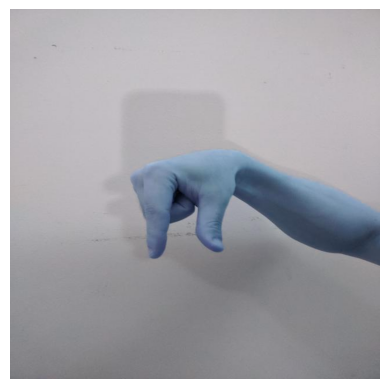

In [14]:
# Если байтовые данные найдены, продолжим обработку
if image_bytes:
    # Преобразуем байты в массив NumPy
    image_array = np.frombuffer(image_bytes, dtype=np.uint8)

    # Декодируем изображение с использованием OpenCV
    opencv_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Отобразим изображение с помощью matplotlib
    plt.imshow(opencv_image)
    plt.axis('off')
    plt.show()
else:
    print("Байтовые данные изображения не найдены в словаре.")

***Проверка работы преобразования RGB данного в ч/б***
На примере последнего

In [15]:
# Выберем последнее изображение из столбца 'image'
last_image_dict = df['image'].iloc[-1]

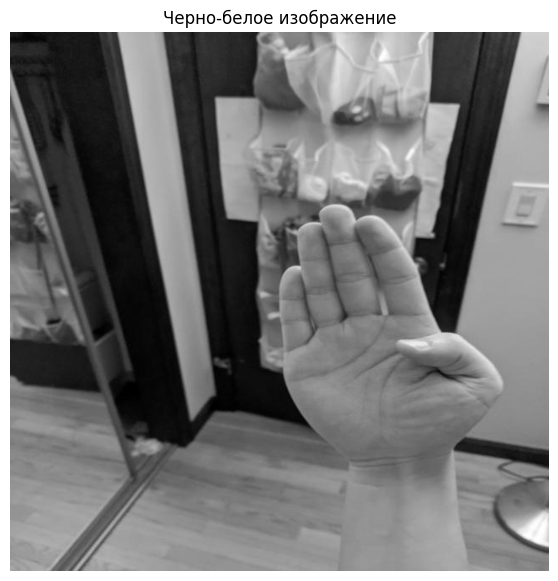

In [16]:
# Попробуем получить байтовые данные изображения из словаря
image_bytes = None
for key in last_image_dict.keys():
    if isinstance(last_image_dict[key], bytes):
        image_bytes = last_image_dict[key]
        break

# Если байтовые данные найдены, продолжим обработку
if image_bytes:
    # Преобразуем байты в массив NumPy
    image_array = np.frombuffer(image_bytes, dtype=np.uint8)

    # Декодируем изображение с использованием OpenCV
    opencv_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Преобразуем изображение в черно-белый формат
    gray_image = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2GRAY)

    # Отобразим изображение с помощью matplotlib
    plt.figure(figsize=(7, 7))
    plt.imshow(gray_image, cmap='gray')
    plt.title('Черно-белое изображение')
    plt.axis('off')
    plt.show()
else:
    print("Байтовые данные изображения не найдены в словаре.")

*Так, всё работает*
Так как черно-белые изображения занимают меньше места по сравнению с цветными, применим ко всем (преобразуем все изображения в черно-белые и назначим их в строки столбца image_opencv функцией apply в pandas):

In [17]:
# Функция для преобразования изображения в черно-белый формат
def convert_to_gray(image):
    if image is not None:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return gray_image
    else:
        return None


In [18]:
# Применение функции к столбцу 'image_opencv'
df['image_opencv'] = df['image_opencv'].apply(convert_to_gray)

In [19]:
# Отображение первых несколько строк DataFrame после преобразования
print(df.head())

   image_id                                              image  width  height  \
0       184  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    640     640   
1       403  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    640     640   
2       393  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    640     640   
3       317  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    640     640   
4       304  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    640     640   

                                             objects  \
0  {'id': [184], 'area': [39601], 'bbox': [[200.0...   
1  {'id': [403], 'area': [81840], 'bbox': [[56.0,...   
2  {'id': [393], 'area': [91178], 'bbox': [[87.0,...   
3  {'id': [317], 'area': [30397], 'bbox': [[237.0...   
4  {'id': [304], 'area': [92757], 'bbox': [[32.0,...   

                                        image_opencv  
0  [[172, 173, 175, 176, 177, 176, 175, 174, 177,...  
1  [[168, 167, 167, 167, 167, 167, 166, 166, 169,...  
2  [[69, 70

Проверим назначились ли преобразования

In [20]:
# Получение последнего изображения из столбца 'image_opencv'
last_image = df['image_opencv'].iloc[-1]

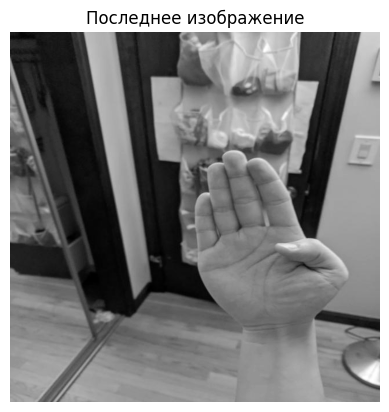

In [21]:
# Отображение последнего изображения
plt.imshow(last_image, cmap='gray')  # Черно-белое изображение
plt.title('Последнее изображение')
plt.axis('off')
plt.show()

Сейчас все наши изображения ч/б и в строах под столбцом image_opencv, то есть по-сути столбец image можно снести

In [22]:
# Удаление столбца 'image'
df = df.drop(columns=['image'])

In [23]:
print(df.columns)

Index(['image_id', 'width', 'height', 'objects', 'image_opencv'], dtype='object')


**Столбец успешно удалился

*Функция для проверки наличия **лица** на изображении*




 (Haar Cascade) - для расопзнавания лиц
# инициализируется с помощью cv2.CascadeClassifier
# detectMultiScale для поиска лиц на изображении
Если лица обнаружены, они выделяются на изображении и отображаются с использованием *matplotlib*

In [25]:
def has_face(image_opencv):
    # Проверяем, является ли изображение черно-белым
    if len(image_opencv.shape) == 3 and image_opencv.shape[2] == 3:
        gray = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)
    else:
        gray = image_opencv  # Если изображение уже черно-белое, пропускаем его
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return len(faces) > 0

*Инициализация каскада для распознавания лиц*

In [26]:
# Загрузка каскада для детекции лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

Выберем последнеее изображение из столбца 'image_opencv'

In [27]:
# Получение последнего изображения из столбца 'image_opencv'
last_image_opencv = df['image_opencv'].iloc[-1]

In [28]:
# Применение функции has_face к последнему изображению
if has_face(last_image_opencv):
    print("Лица обнаружены на последнем изображении.")
else:
    print("Лица не обнаружены на последнем изображении.")

Лица не обнаружены на последнем изображении.


Проверим все

In [29]:
# Применение функции has_face ко всем изображениям в столбце 'image_opencv'
df['has_face'] = df['image_opencv'].apply(has_face)

С этим поосторожнее надо, это пока не понимаю работает ли, но по-сути нам это и не нужно

In [ ]:
# Вывод изображений с лицами
for index, row in df[df['has_face']].iterrows():
    plt.imshow(cv2.cvtColor(row['image_opencv'], cv2.COLOR_BGR2RGB))
    plt.title(f'Изображение {index} с лицами')
    plt.axis('off')
    plt.show()

# Вывод сообщения об отсутствии лиц
if df['has_face'].any():
    print("Лица обнаружены на некоторых изображениях.")
else:
    print("Лица не обнаружены на всех изображениях.")

Убедились, что для обнаружения лиц в наших image данных лучше применять другие библиотеки. Например, можно применить библиотеку **face_recognition** для распознавания и работы с лицами, который бы работал в тандеме с **dlib** для машинного зрения и машинного обучения, но в связи с ограничением по объему памяти гугл диска (ибо работаем в гугл колаб), и отсутствия требуемых мощностей техники, нет возможности использовать данные ресурсы, поэтому идём дальше


**Рассмотрим руки!**

*Инициализация каскада для распознавания рук (# Инициализация каскада для распознавания верхней части тела (включая руки))*

In [31]:
upperbody_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_upperbody.xml')

*Подсчёт количества изображений в столбце 'image', на которых обнаружены руки с использованием Haar-каскада для рук*

In [32]:
# Функция для подсчета изображений с руками
def count_images_with_hands(image_array):
    # Преобразуем массив NumPy в изображение OpenCV
    opencv_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

    # Преобразуем изображение в оттенки серого для работы с каскадом
    gray_image = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2GRAY)

    # Поиск верхних частей тела (включая руки) на изображении
    upperbodies = upperbody_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Если верхние части тела (включая руки) найдены, вернем 1, иначе 0
    return 1 if len(upperbodies) > 0 else 0

# Подсчет изображений с верхними частями тела (включая руки)
count_hands = df['image_opencv'].apply(count_images_with_hands).sum()

In [33]:
print(f"Количество изображений с верхними частями тела (включая руки): {count_hands}")

Количество изображений с верхними частями тела (включая руки): 18


*сомнительно, попробуем другое*

# Инициализация каскада для распознавания руки


In [34]:
hand_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_hand.xml')

!!!*Импортируем некие библиотеки*

In [35]:
import requests
from io import BytesIO
import zipfile
import os

In [36]:
# Загрузка файла каскада для руки
hand_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_hand.xml')

In [37]:
# Заменим 'haarcascade_hand.xml' на вашу скопированную ссылку haarcascade_hand.xml
shared_link = 'haarcascade_hand.xml'


In [38]:
# Получение ID файла из ссылки
file_id = shared_link.split('/')[-1]
file_id = file_id.split('?')[0]

In [39]:
# Формирование прямой ссылки на скачивание файла
download_link = f'https://drive.google.com/uc?id={file_id}'

In [40]:
# Загрузка файла
response = requests.get(download_link)

In [41]:
# Замена 'haarcascade_hand.xml' на фактическое имя вашего файла и укажите путь для сохранения
cascade_path = '/content/haarcascade_hand.xml'

In [42]:
# Сохранение файла
with open(cascade_path, 'wb') as f:
    f.write(response.content)

In [43]:
# Функция для подсчета изображений с руками и обработки изображения
def process_image(image_opencv):
    # Здесь вы можете добавить свою логику обработки изображения
    # Например, проверка наличия рук на изображении
    has_hands = has_hands_function(image_opencv)

    # Если руки обнаружены, обработаем изображение (например, выделение рук)
    if has_hands:
        processed_image = process_hands_function(image_opencv)
        return 1, processed_image
    else:
        return 0, None

In [44]:
# Пример функции для проверки наличия рук на изображении
def has_hands_function(image_opencv):
    # Ваш код для проверки наличия рук на изображении
    # Возвращайте True, если руки обнаружены, и False в противном случае
    return True  # Пример, замените на свою логику

In [45]:
# Пример функции для обработки изображения с руками
def process_hands_function(image_opencv):
    # Ваш код для обработки изображения с руками
    # Возвращайте обработанное изображение
    return image_opencv  # Пример, замените на свою логику

Это если надо вывести каждое ихображение с рукой:
# Подсчет и обработка изображений
count_hand_images = 0
for index, row in df.iterrows():
    result, processed_image = process_image(row['image_opencv'])
    count_hand_images += result
    if processed_image is not None:
        # Отобразите обработанное изображение (замените на свой код вывода)
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Processed Image {index}')
        plt.axis('off')
        plt.show()

Это если надо вывести каждое ихображение с рукой:
# Подсчет и обработка изображений
count_hand_images = 0
for index, row in df.iterrows():
    result, processed_image = process_image(row['image_opencv'])
    count_hand_images += result
    if processed_image is not None:
        # Отобразите обработанное изображение (замените на свой код вывода)
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Processed Image {index}')
        plt.axis('off')
        plt.show()

In [47]:
# Подсчет и обработка изображений
count_hand_images = 0
for index, row in df.iterrows():
    result, processed_image = process_image(row['image_opencv'])
    count_hand_images += result

In [48]:
print(f"Количество изображений с руками: {count_hand_images}")

Количество изображений с руками: 504


*Ура, получилось!*
100% - во всех изображениях руки, то есть отсекать данные "без" рук не нужно!

**Вывод параметров всех изображений в столбце 'image_opencv'**

Форма (shape), тип данных (dtype), минимальное и максимальное значение пикселя

In [50]:
# Получение первой строки из DataFrame
first_row = df.iloc[0]

In [52]:
# Извлечение изображения из первой строки
first_image_opencv = first_row['image_opencv']

In [54]:
# Функция для вывода параметров изображения
def print_image_parameters(image_opencv):
    print(f"Shape: {image_opencv.shape}")
    print(f"Data type: {image_opencv.dtype}")
    print(f"Min pixel value: {np.min(image_opencv)}")
    print(f"Max pixel value: {np.max(image_opencv)}")


In [56]:
# Применение функции к каждому изображению в столбце 'image_opencv'
for index, row in df.iterrows():
    image_opencv = row['image_opencv']

In [57]:
# Вывод параметров для первого изображения
print("Parameters for the First Image:")
print_image_parameters(first_image_opencv)
print("-" * 30)


Parameters for the First Image:
Shape: (640, 640)
Data type: uint8
Min pixel value: 3
Max pixel value: 200
------------------------------


In [ ]:
И так можно выводить параметр любого изображения

Построим график выбросов по минимальному значению пикселя (Min pixel value

In [58]:
# Создание списка минимальных значений пикселей
min_pixel_values = df['image_opencv'].apply(lambda x: np.min(x))

In [59]:
# Определение порога для выбросов
min_pixel_threshold = 50  # Пример значения порога, измените его по необходимости

In [60]:
# Индексы выбросов (где Min pixel value меньше порогового значения)
outlier_indices = min_pixel_values[min_pixel_values < min_pixel_threshold].index


outlier_indices: индексы выбросов в данных.
min_pixel_values[outlier_indices]: значения выбросов.
color='red': цвет точек выбросов (красный).
label='Outliers': метка, которая будет отображаться в легенде для точек выбросов.

In [63]:
# Создание столбца 'min_pixel_values'
df['min_pixel_values'] = df['image_opencv'].apply(lambda img: np.min(img))

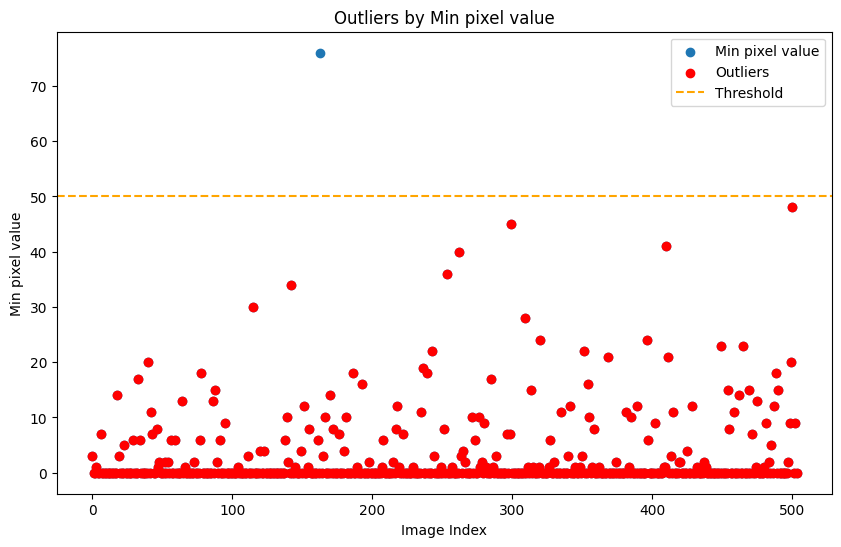

In [64]:
# Построение графика всех значений и выделение выбросов
plt.figure(figsize=(10, 6))
plt.scatter(range(len(min_pixel_values)), min_pixel_values, label='Min pixel value')
plt.scatter(outlier_indices, min_pixel_values[outlier_indices], color='red', label='Outliers')
plt.axhline(min_pixel_threshold, color='orange', linestyle='--', label='Threshold')
plt.xlabel('Image Index')
plt.ylabel('Min pixel value')
plt.title('Outliers by Min pixel value')
plt.legend()
plt.show()

*Min pixel value* указывает на минимальное значение яркости среди всех пикселей на конкретном изображении

Удаление выбросов изображений по параметру Min pixel value

In [65]:
# Удаление строк, где min_pixel_values больше или равно 30
filtered_df = df[df['min_pixel_values'] < 30]

In [66]:
df = filtered_df

Сделалем график выбросов для обновленных данных

In [67]:
# Создание списка минимальных значений пикселей
min_pixel_values = df['image_opencv'].apply(lambda x: np.min(x))

In [68]:
# Определение порога для выбросов
min_pixel_threshold = 50

In [69]:
# Индексы выбросов (где Min pixel value меньше порогового значения)
outlier_indices = min_pixel_values[min_pixel_values < min_pixel_threshold].index

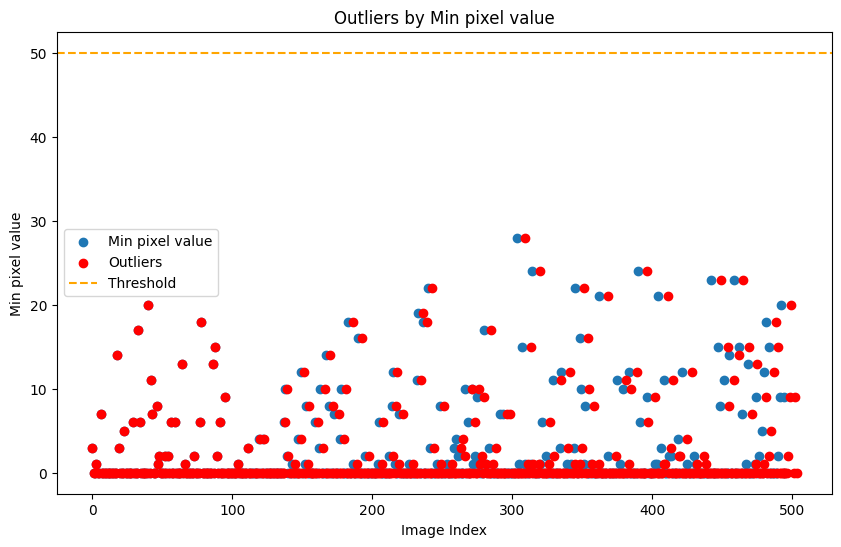

In [70]:
# Построение графика всех значений и выделение выбросов
plt.figure(figsize=(10, 6))
plt.scatter(range(len(min_pixel_values)), min_pixel_values, label='Min pixel value')
plt.scatter(outlier_indices, min_pixel_values[outlier_indices], color='red', label='Outliers')
plt.axhline(min_pixel_threshold, color='orange', linestyle='--', label='Threshold')
plt.xlabel('Image Index')
plt.ylabel('Min pixel value')
plt.title('Outliers by Min pixel value')
plt.legend()
plt.show()


То есть удалили данные с минимальным пиксельным значением более и равным 30

То же самое делаем для **Max pixel value**

In [ ]:
# Создание списка максимальных значений пикселей
max_pixel_values = df['image_opencv'].apply(lambda x: np.max(x))

In [ ]:
# Определение порога для выбросов (пусть будет 160)
max_pixel_threshold = 160

In [ ]:
# Индексы выбросов (где Max pixel value больше порогового значения)
outlier_indices_max = max_pixel_values[max_pixel_values >= max_pixel_threshold].index

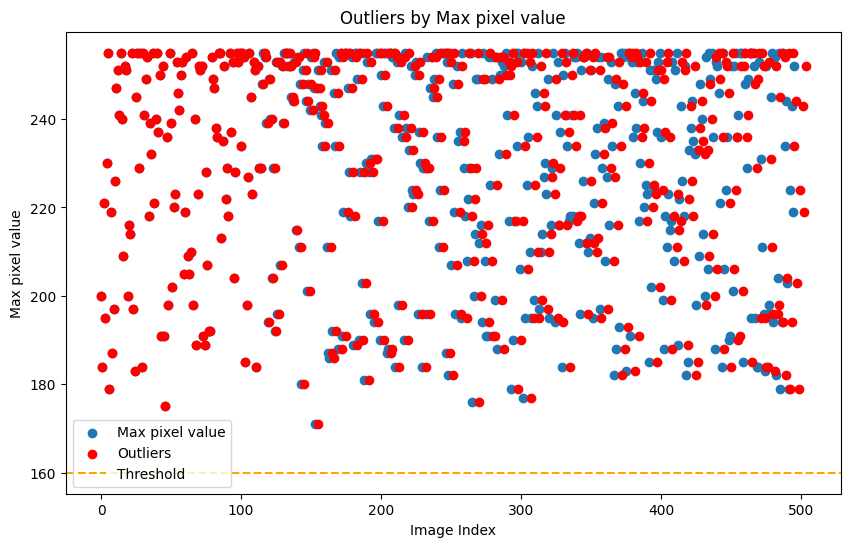

In [ ]:
# Построение графика всех значений и выделение выбросов по Max pixel value
plt.figure(figsize=(10, 6))
plt.scatter(range(len(max_pixel_values)), max_pixel_values, label='Max pixel value')
plt.scatter(outlier_indices_max, max_pixel_values[outlier_indices_max], color='red', label='Outliers')
plt.axhline(max_pixel_threshold, color='orange', linestyle='--', label='Threshold')
plt.xlabel('Image Index')
plt.ylabel('Max pixel value')
plt.title('Outliers by Max pixel value')
plt.legend()
plt.show()

Так всё и оставим